In [56]:
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

mapbox_access_token = ''
pio.orca.config.mapbox_access_token = mapbox_access_token

In [57]:
df = pd.read_csv('zip_data/us-zip-code-latitude-and-longitude.csv', sep = ';')
df.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,5665,North Hyde Park,VT,44.673070,-72.597057,-5,1,"44.67307,-72.597057"
1,544,Holtsville,NY,40.922326,-72.637078,-5,1,"40.922326,-72.637078"
2,23414,Nelsonia,VA,37.816896,-75.583227,-5,1,"37.816896,-75.583227"
3,16832,Coburn,PA,40.847255,-77.476330,-5,1,"40.847255,-77.47633"
4,8019,Chatsworth,NJ,39.777314,-74.535400,-5,1,"39.777314,-74.5354"


In [58]:
df = df[df['State']=='TX']

In [59]:
df = df[['Zip', 'Latitude', 'Longitude']]

In [60]:
print(df.shape)
df.head()

(2743, 3)


,Zip,Latitude,Longitude
42,79226,34.971719,-100.90662
43,79830,30.011559,-103.56444
118,79550,32.747707,-100.91530
160,75206,32.826128,-96.77120
161,78014,28.435440,-99.21676


In [61]:
df.to_csv('Zip_long_lat.csv')

In [62]:
lats = list(df['Latitude'].astype(str))
longs = list(df['Longitude'].astype(str))

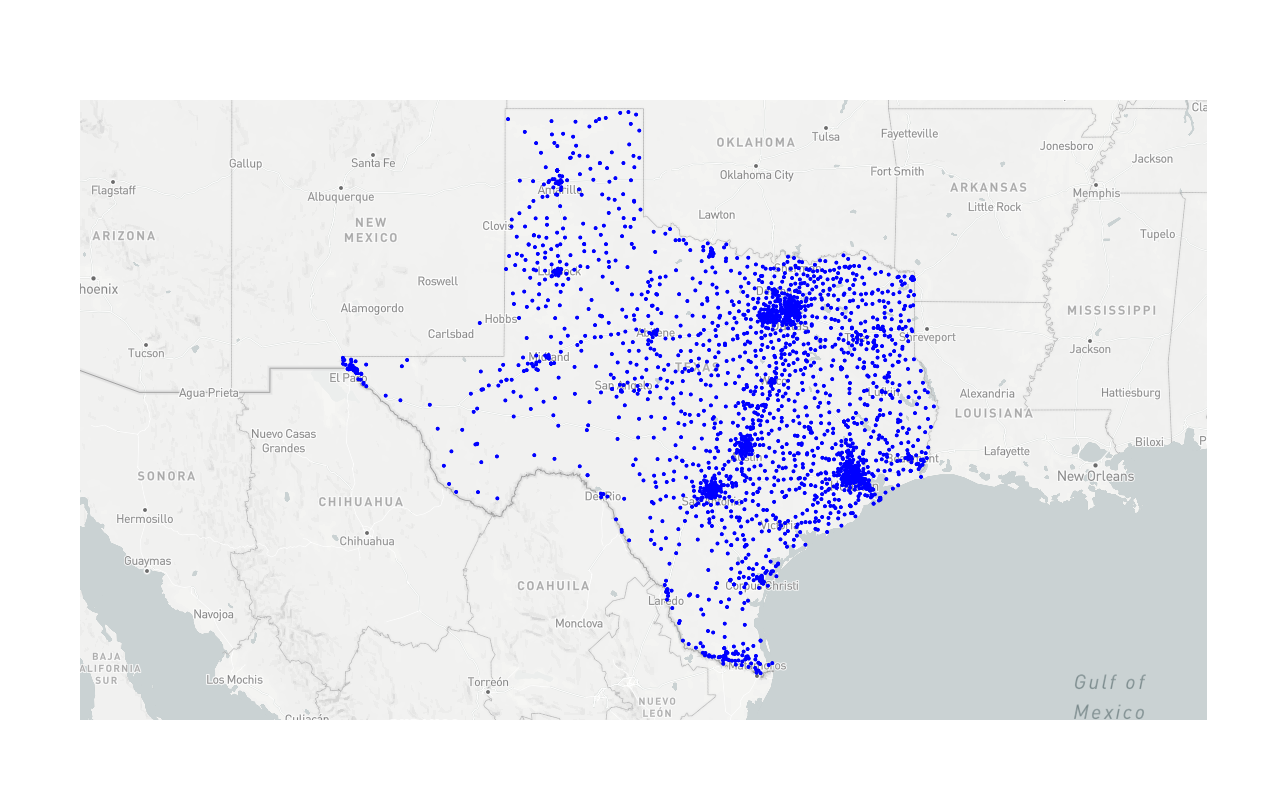

In [63]:
data = [dict(type='scattermapbox',
               lat=lats,
               lon=longs,
               mode='markers',
               marker=dict(size=5, color='blue')
            )
        ]

layout = dict(
    autosize=False,
    height = 800,
    width = 800,
    hovermode='closest',
    mapbox=dict(accesstoken=mapbox_access_token,
                bearing=0,
                center=dict(lat=31,
                            lon=-100
                            ),
                pitch=0,
                zoom=5,
                style='light'
                )
            )
fig = go.Figure(data=data, layout=layout)
iplot(fig, validate=False)
pio.write_image(fig, 'zip_data/images/TX_zips.pdf')